# Student Performance Data Exploration

**Purpose:**
This notebook explores the raw student dataset to understand its structure, distributions, relationships, and potential anomalies.
Key objectives include:
- Inspecting data shape, types, and missing values
- Computing descriptive statistics
- Identifying patterns and trends
- Detecting potential outliers
- Investigating relationships between features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive plots
import plotly.express as px

sns.set_style("whitegrid")

In [2]:
df_raw = pd.read_csv("../data/raw.csv", sep=';')

# Display basic information
print("Shape of dataset:", df_raw.shape)
display(df_raw.head())

# Data types
print("\nData Types:")
display(df_raw.dtypes)

# Check for missing values
print("\nMissing values per column:")
display(df_raw.isnull().sum())

Shape of dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,NaN,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Data Types:


school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
dtype: object


Missing values per column:


school        0
sex           1
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          1
Fjob          0
reason        0
guardian      2
traveltime    1
studytime     2
failures      0
schoolsup     0
famsup        0
paid          2
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
# Numeric summary
desc = df_raw.describe().round(2)
desc.rename(index={"50%": "50% (median)"}, inplace=True)
display(desc)

# Categorical summary
cat_cols = df_raw.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    display(df_raw[col].value_counts())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,394.00,393.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50% (median),17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00



Value counts for school:


school
GP    349
MS     46
Name: count, dtype: int64


Value counts for sex:


sex
F    208
M    186
Name: count, dtype: int64


Value counts for address:


address
U    307
R     88
Name: count, dtype: int64


Value counts for famsize:


famsize
GT3    281
LE3    114
Name: count, dtype: int64


Value counts for Pstatus:


Pstatus
T    354
A     41
Name: count, dtype: int64


Value counts for Mjob:


Mjob
other       141
services    103
at_home      58
teacher      58
health       34
Name: count, dtype: int64


Value counts for Fjob:


Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64


Value counts for reason:


reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64


Value counts for guardian:


guardian
mother    272
father     89
other      32
Name: count, dtype: int64


Value counts for schoolsup:


schoolsup
no     344
yes     51
Name: count, dtype: int64


Value counts for famsup:


famsup
yes    242
no     153
Name: count, dtype: int64


Value counts for paid:


paid
no     212
yes    181
Name: count, dtype: int64


Value counts for activities:


activities
yes    201
no     194
Name: count, dtype: int64


Value counts for nursery:


nursery
yes    314
no      81
Name: count, dtype: int64


Value counts for higher:


higher
yes    375
no      20
Name: count, dtype: int64


Value counts for internet:


internet
yes    329
no      66
Name: count, dtype: int64


Value counts for romantic:


romantic
no     263
yes    132
Name: count, dtype: int64

In [4]:
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns

print("Outliers detected per column (IQR method):")
for col in numeric_cols:
    q1 = df_raw[col].quantile(0.25)
    q3 = df_raw[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df_raw[(df_raw[col] < lower) | (df_raw[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Outliers detected per column (IQR method):
age: 1 outliers
Medu: 0 outliers
Fedu: 2 outliers
traveltime: 8 outliers
studytime: 27 outliers
failures: 83 outliers
famrel: 26 outliers
freetime: 19 outliers
goout: 0 outliers
Dalc: 18 outliers
Walc: 0 outliers
health: 0 outliers
absences: 15 outliers
G1: 0 outliers
G2: 13 outliers
G3: 0 outliers


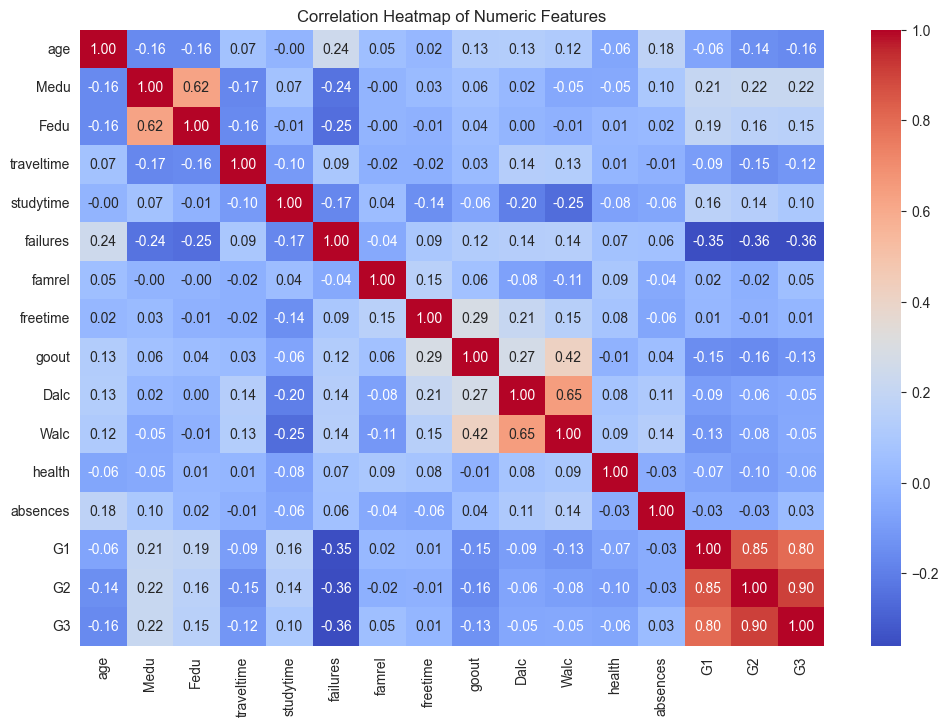

In [5]:
# Correlation matrix
numeric_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns
corr = df_raw[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

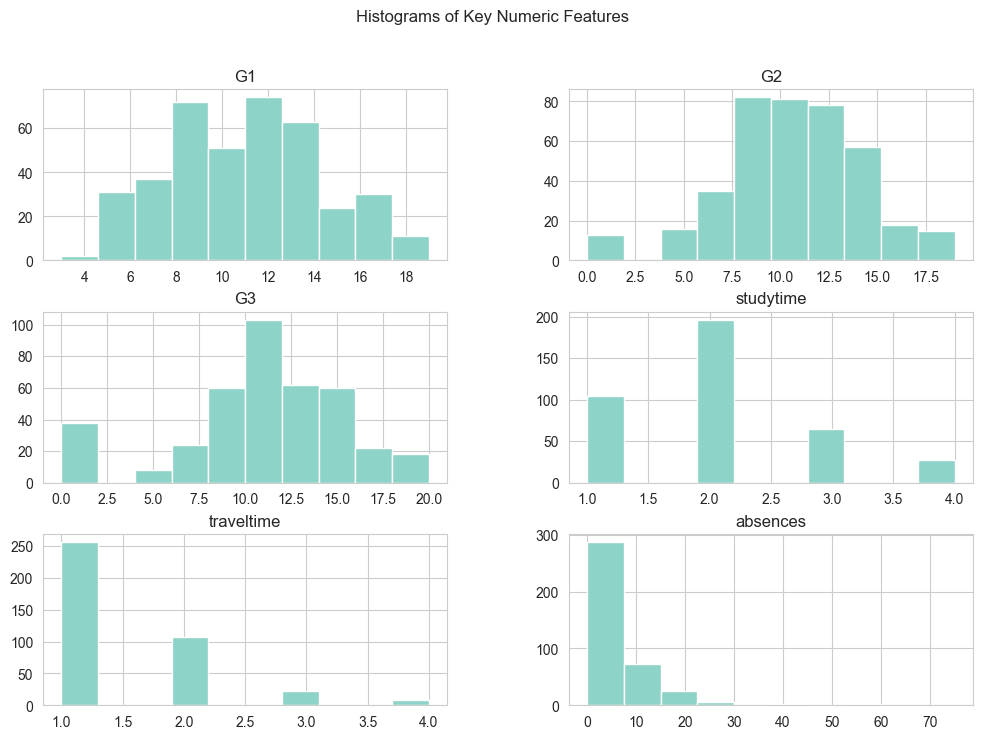

In [6]:
# Histograms and KDE for grades
numeric_cols = ["G1", "G2", "G3", "studytime", "traveltime", "absences"]
df_raw[numeric_cols].hist(bins=10, figsize=(12,8))
plt.suptitle("Histograms of Key Numeric Features")
plt.show()

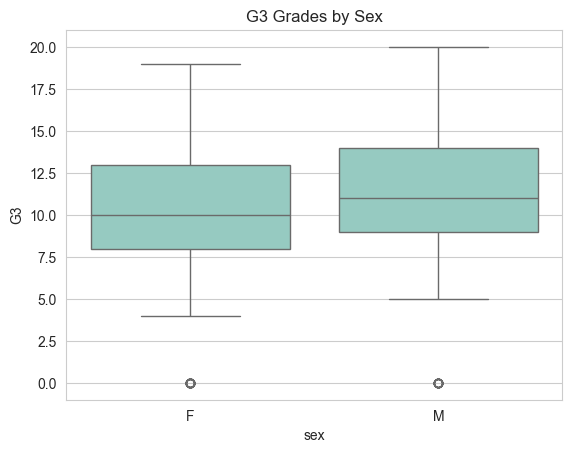

In [7]:
# Box plots for G3 by sex
sns.boxplot(x="sex", y="G3", data=df_raw)
plt.title("G3 Grades by Sex")
plt.show()

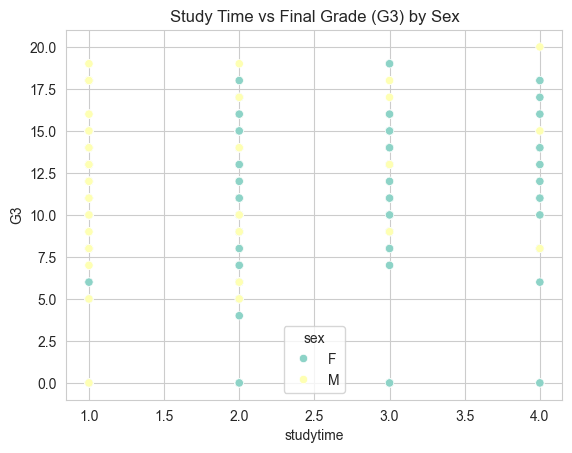

In [8]:
# Scatter plot
sns.scatterplot(x="studytime", y="G3", hue="sex", data=df_raw)
plt.title("Study Time vs Final Grade (G3) by Sex")
plt.show()